In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime 

In [2]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [3]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [4]:
from nba_api.stats.endpoints.leagueleaders import LeagueLeaders

In [5]:
from nba_api.stats.static.teams import get_teams
from nba_api.stats.static.players import get_active_players

# 2019-2020 League Leaders

In [6]:
ll_1 = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS', season='2019-20')
df_ll_1 = ll_1.get_data_frames()[0]
df_ll_1.head()
#Per game statistics
#I've taken a look at the league leaders of last season before draft

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,201935,1,James Harden,HOU,68,36.5,9.9,22.3,0.444,4.4,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,34.3,32.6
1,203078,2,Bradley Beal,WAS,57,36.0,10.4,22.9,0.455,3.0,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,30.5,25.4
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,0.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9
3,1629027,4,Trae Young,ATL,60,35.3,9.1,20.8,0.437,3.4,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,29.6,26.6
4,203507,5,Giannis Antetokounmpo,MIL,63,30.4,10.9,19.7,0.553,1.4,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,29.5,34.6


In [7]:
df_ll_1['eFG%'] = (df_ll_1['FGM'] + 0.5 * df_ll_1['FG3M']) / df_ll_1['FGA']

In [8]:
df_ll_1['eFG%'] = df_ll_1['eFG%'].round(2)

In [9]:
df_ll_1 = df_ll_1.sort_values(by=['PTS', 'eFG%'], ascending=False)
#Sorted by PTS and eFG%

In [10]:
print('League Average 2019-20')
for cols in df_ll_1.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll_1[cols].mean():.2f}')

League Average 2019-20
PLAYER_ID: 928477.02
RANK: 130.99
GP: 61.93
MIN: 25.26
FGM: 4.37
FGA: 9.48
FG_PCT: 0.46
FG3M: 1.34
FG3A: 3.69
FG3_PCT: 0.34
FTM: 1.95
FTA: 2.50
FT_PCT: 0.77
OREB: 1.01
DREB: 3.61
REB: 4.62
AST: 2.63
STL: 0.80
BLK: 0.50
TOV: 1.47
PTS: 12.02
EFF: 13.43
eFG%: 0.53


# 2020-2021 League Leaders

In [11]:
ll = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS')
df_ll = ll.get_data_frames()[0]
df_ll.head()
#Per game statistics

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,203078,1,Bradley Beal,WAS,10,35.9,12.1,24.5,0.494,2.4,...,0.874,1.5,3.8,5.3,5.0,1.4,0.7,3.3,34.9,30.4
1,201939,2,Stephen Curry,GSW,12,34.4,9.2,20.5,0.447,4.2,...,0.934,0.8,4.8,5.6,6.2,1.3,0.2,3.4,28.4,26.4
2,203897,3,Zach LaVine,CHI,12,35.8,9.8,19.8,0.498,3.7,...,0.845,0.3,4.9,5.3,4.8,1.3,0.6,4.3,28.3,25.1
3,203468,4,CJ McCollum,POR,12,35.1,9.8,20.8,0.470,4.9,...,0.844,0.6,3.7,4.3,5.3,1.4,0.3,1.1,27.6,26.2
4,1629029,5,Luka Doncic,DAL,10,34.2,9.9,21.1,0.469,1.9,...,0.744,0.8,8.7,9.5,8.8,1.1,0.9,4.3,27.5,30.3


In [12]:
df_ll.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')

In [13]:
df_ll['eFG%'] = (df_ll['FGM'] + 0.5 * df_ll['FG3M']) / df_ll['FGA']

In [14]:
df_ll['eFG%'] = df_ll['eFG%'].round(2)

In [15]:
df_ll = df_ll.sort_values(by=['PTS', 'eFG%'], ascending=False)

In [16]:
print('League Average 2020-2021')
for cols in df_ll.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll[cols].mean():.2f}')

League Average 2020-2021
PLAYER_ID: 1001066.52
RANK: 136.33
GP: 11.00
MIN: 24.52
FGM: 4.21
FGA: 9.07
FG_PCT: 0.47
FG3M: 1.33
FG3A: 3.61
FG3_PCT: 0.32
FTM: 1.73
FTA: 2.27
FT_PCT: 0.73
OREB: 1.02
DREB: 3.62
REB: 4.64
AST: 2.51
STL: 0.80
BLK: 0.51
TOV: 1.41
PTS: 11.48
EFF: 13.11
eFG%: 0.54


# After draft

In [65]:
players_first = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Thomas Bryant', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Anthony Edwards']
#This is my team after draft

players = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Patrick Beverly', 'Hamidou Diallo']
#Anthony Edwards out, Bismack Biyombo in
#Thomas Bryant out due to injury
#Bismack Biyombo out
#Patrick Beverly in
#Hamidou Diallo in

df_ll_1['Fantasy_team'] = 'N'

for player in df_ll_1.loc[: ,'PLAYER']:
    if player in players:
        df_ll_1.loc[df_ll_1[df_ll_1['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [66]:
df_ll_1.loc[df_ll_1.Fantasy_team == 'Y'] #My players in 2019-20 season
#Where is Jusuf Nurkic and Thomas Bryant? Anthony Edwards has been drafted in 2020. 

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9,0.57,Y
15,1626156,16,D'Angelo Russell,MIN,45,32.3,8.0,18.8,0.426,3.5,...,3.6,3.9,6.3,1.1,0.3,3.3,23.1,19.8,0.52,Y
31,202699,32,Tobias Harris,PHI,72,34.3,7.7,16.3,0.471,1.8,...,5.9,6.9,3.2,0.7,0.6,1.4,19.6,20.3,0.53,Y
38,203471,39,Dennis Schroder,OKC,65,30.8,7.0,14.8,0.469,1.9,...,3.3,3.6,4.0,0.7,0.2,2.6,18.9,16.5,0.54,Y
63,1628389,64,Bam Adebayo,MIA,72,33.6,6.1,11.0,0.557,0.0,...,7.8,10.2,5.1,1.1,1.3,2.8,15.9,24.3,0.55,Y
74,203115,75,Will Barton,DEN,58,33.0,5.7,12.7,0.450,1.9,...,5.0,6.3,3.7,1.1,0.5,1.5,15.1,17.5,0.52,Y
92,203935,93,Marcus Smart,BOS,60,32.0,4.3,11.4,0.375,2.3,...,3.1,3.8,4.9,1.7,0.5,1.7,12.9,14.5,0.48,Y
108,201143,109,Al Horford,PHI,67,30.2,4.8,10.6,0.450,1.5,...,5.3,6.8,4.0,0.8,0.9,1.2,11.9,17.1,0.52,Y
127,1629629,128,Cam Reddish,ATL,58,26.7,3.7,9.6,0.384,1.4,...,3.1,3.7,1.5,1.1,0.5,1.7,10.5,9.3,0.46,Y
155,1628464,156,Daniel Theis,BOS,65,24.1,3.7,6.6,0.566,0.5,...,4.4,6.6,1.7,0.6,1.3,0.8,9.2,15.3,0.60,Y


In [67]:
for player in df_ll.loc[: ,'PLAYER']:
    if player in players:
        df_ll.loc[df_ll[df_ll['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [68]:
df_ll_fant_team = df_ll.loc[df_ll.Fantasy_team == 'Y']
df_ll_fant_team #My players in 2020-21 season

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
5,203081,6,Damian Lillard,POR,12,35.7,8.3,18.7,0.442,3.8,...,4.3,4.7,6.8,1.0,0.3,2.9,26.9,25.8,0.55,Y
30,1626156,31,D'Angelo Russell,MIN,11,31.5,7.7,17.7,0.436,2.8,...,2.6,3.2,5.5,1.3,0.4,3.5,20.7,16.5,0.51,Y
39,202699,40,Tobias Harris,PHI,10,32.5,7.5,14.7,0.510,2.3,...,6.2,7.5,3.0,1.1,0.9,2.0,18.9,21.9,0.59,Y
48,1628389,49,Bam Adebayo,MIA,8,30.4,6.5,10.1,0.642,0.0,...,7.9,9.0,5.0,1.0,1.0,3.4,17.4,25.3,0.64,Y
70,1628418,71,Thomas Bryant,WAS,10,27.1,5.9,9.1,0.648,0.9,...,4.3,6.1,1.5,0.4,0.8,1.1,14.3,18.0,0.70,Y
73,203471,74,Dennis Schroder,LAL,14,30.9,5.3,12.6,0.418,1.2,...,3.5,4.1,4.8,1.0,0.2,2.4,14.1,13.9,0.47,Y
91,1630162,92,Anthony Edwards,MIN,11,24.7,4.8,12.7,0.379,1.5,...,1.8,2.9,1.9,0.5,0.2,1.8,12.5,7.9,0.44,Y
95,203935,96,Marcus Smart,BOS,10,32.8,3.6,10.1,0.356,2.1,...,2.1,2.7,6.0,1.5,0.6,1.7,12.4,14.1,0.46,Y
100,1629629,101,Cam Reddish,ATL,11,28.5,4.1,10.8,0.378,1.7,...,3.8,4.6,1.1,1.4,0.2,1.6,12.2,10.6,0.46,Y
102,203115,103,Will Barton,DEN,12,29.2,4.6,10.9,0.420,1.6,...,3.6,4.3,2.8,1.2,0.7,0.9,12.1,13.1,0.50,Y


In [69]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [70]:
player_ids = list(df_ll_fant_team.PLAYER_ID)
game_ids = []

for ids in player_ids:
    df = CumeStatsPlayerGames(player_id=ids, league_id='00', season='2020-21', 
                                     season_type_all_star='Regular Season').get_data_frames()[0]
    game_ids.append(df)
game_ids = pd.concat(game_ids)
time.sleep(2)

In [71]:
game_ids.index = range(0,len(game_ids))

In [72]:
game_ids['MATCHUP_DATE'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_DATE'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][0]

In [73]:
game_ids['MATCHUP_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_TEAM'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][1:]

In [74]:
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.MATCHUP_TEAM.iloc[i] = ' '.join(game_ids.MATCHUP_TEAM.iloc[i])

In [75]:
game_ids = game_ids.drop(labels='MATCHUP', axis=1)

In [76]:
game_ids['HOME_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.HOME_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[1]

In [77]:
game_ids['AWAY_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.AWAY_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[0]

In [78]:
game_ids = game_ids.drop('MATCHUP_TEAM', axis=1)
game_ids

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000178,01/14/2021,Trail Blazers,Pacers
1,0022000173,01/13/2021,Kings,Trail Blazers
2,0022000155,01/11/2021,Trail Blazers,Raptors
3,0022000140,01/09/2021,Kings,Trail Blazers
4,0022000122,01/07/2021,Trail Blazers,Timberwolves
...,...,...,...,...
148,0022000056,12/30/2020,Celtics,Grizzlies
149,0022000048,12/29/2020,Pacers,Celtics
150,0022000037,12/27/2020,Pacers,Celtics
151,0022000007,12/25/2020,Celtics,Nets


In [79]:
game_ids.HOME_TEAM = game_ids.HOME_TEAM.str.replace(' ', '')

In [80]:
game_ids.AWAY_TEAM = game_ids.AWAY_TEAM.str.replace(' ', '')

In [81]:
game_ids.loc[game_ids.HOME_TEAM == 'He', 'HOME_TEAM'] = 'Heat'

In [82]:
game_ids[game_ids.HOME_TEAM == '']

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
23,0022000174,01/14/2021,,He
33,0022000136,01/09/2021,,He
36,0022000071,01/01/2021,,He
40,0022000012,12/23/2020,,He
41,0022000136,01/09/2021,,He


In [83]:
from nba_api.stats.endpoints.leaguegamelog import LeagueGameLog

In [84]:
lgl = LeagueGameLog()
time.sleep(2)

In [85]:
df_lgl = lgl.get_data_frames()[0]

In [86]:
df_lgl.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [87]:
df_lgl[df_lgl.GAME_ID == '0022000071']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
136,22020,1610612748,MIA,Miami Heat,0022000071,2021-01-01,MIA @ DAL,L,240,29,...,36,41,20,10,2,16,24,83,-10,1
137,22020,1610612742,DAL,Dallas Mavericks,0022000071,2021-01-01,DAL vs. MIA,W,240,32,...,45,49,18,9,3,17,25,93,10,1


In [88]:
game_ids.loc[game_ids.GAME_ID == '0022000071', 'HOME_TEAM'] = 'Mavericks'

In [89]:
df_lgl[df_lgl.GAME_ID == '0022000012']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
8,22020,1610612748,MIA,Miami Heat,0022000012,2020-12-23,MIA @ ORL,L,240,42,...,36,43,25,11,2,22,21,107,-6,1
9,22020,1610612753,ORL,Orlando Magic,0022000012,2020-12-23,ORL vs. MIA,W,240,42,...,30,41,23,15,3,18,19,113,6,1


In [90]:
game_ids.loc[game_ids.GAME_ID == '0022000012', 'HOME_TEAM'] = 'Magic'

In [91]:
game_ids.loc[game_ids.AWAY_TEAM == 'He', 'AWAY_TEAM'] = 'Heat'

In [92]:
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2

In [93]:
new_data = []
for i in list(game_ids.GAME_ID):
    df = BoxScoreTraditionalV2(game_id=i).get_data_frames()[0]
    new_data.append(df)
new_data = pd.concat(new_data)
time.sleep(2)

In [94]:
new_data.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022000178,1610612754,IND,Indiana,203200,Justin Holiday,F,,25:09,4.0,...,1.0,2.0,3.0,1.0,0.0,1.0,1.0,4.0,11.0,8.0
1,0022000178,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,,38:27,10.0,...,5.0,10.0,15.0,5.0,2.0,0.0,3.0,2.0,23.0,17.0
2,0022000178,1610612754,IND,Indiana,1626167,Myles Turner,C,,37:19,4.0,...,1.0,9.0,10.0,0.0,1.0,4.0,3.0,2.0,11.0,13.0
3,0022000178,1610612754,IND,Indiana,1628410,Edmond Sumner,G,,19:32,3.0,...,2.0,1.0,3.0,2.0,2.0,0.0,0.0,1.0,7.0,-6.0
4,0022000178,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,,34:49,10.0,...,2.0,3.0,5.0,7.0,3.0,0.0,2.0,2.0,25.0,13.0


In [95]:
df_inner_join = pd.merge(new_data, game_ids, on='GAME_ID', how='inner')

In [96]:
df_inner_join.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000178,1610612754,IND,Indiana,203200,Justin Holiday,F,,25:09,4.0,...,1.0,0.0,1.0,1.0,4.0,11.0,8.0,01/14/2021,TrailBlazers,Pacers
1,0022000178,1610612754,IND,Indiana,203200,Justin Holiday,F,,25:09,4.0,...,1.0,0.0,1.0,1.0,4.0,11.0,8.0,01/14/2021,TrailBlazers,Pacers
2,0022000178,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,,38:27,10.0,...,5.0,2.0,0.0,3.0,2.0,23.0,17.0,01/14/2021,TrailBlazers,Pacers
3,0022000178,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,,38:27,10.0,...,5.0,2.0,0.0,3.0,2.0,23.0,17.0,01/14/2021,TrailBlazers,Pacers
4,0022000178,1610612754,IND,Indiana,1626167,Myles Turner,C,,37:19,4.0,...,0.0,1.0,4.0,3.0,2.0,11.0,13.0,01/14/2021,TrailBlazers,Pacers


In [97]:
df_inner_join = df_inner_join.drop_duplicates()
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE', ascending=False)

In [98]:
df_inner_join['MATCHUP_DATE'] = pd.to_datetime(df_inner_join.MATCHUP_DATE)

In [99]:
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE')

In [100]:
df_inner_join.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM'],
      dtype='object')

In [101]:
df_inner_join_fant = df_inner_join[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID','PLAYER_NAME', 
                                    'START_POSITION', 'COMMENT', 'MIN', 'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 
                                    'STL', 'BLK', 'TO', 'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM']]
df_inner_join_fant
#Dataframe of my players' games.
#Parameters are the ones considered in fantasy game.
#'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO'

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FG_PCT,...,FG3M,PTS,REB,AST,STL,BLK,TO,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
5319,0022000002,1610612747,LAL,Los Angeles,201162,Jared Dudley,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22,Lakers,Clippers
5317,0022000002,1610612747,LAL,Los Angeles,1629659,Talen Horton-Tucker,,,10:51,1.000,...,0.0,6.0,1.0,0.0,1.0,0.0,1.0,2020-12-22,Lakers,Clippers
5294,0022000002,1610612746,LAC,LA,201587,Nicolas Batum,F,,28:10,0.250,...,1.0,3.0,6.0,6.0,2.0,0.0,1.0,2020-12-22,Lakers,Clippers
5320,0022000002,1610612747,LAL,Los Angeles,1628035,Alfonzo McKinnie,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22,Lakers,Clippers
5318,0022000002,1610612747,LAL,Los Angeles,1626188,Quinn Cook,,,1:23,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,0022000180,1610612738,BOS,Boston,1630202,Payton Pritchard,,,25:16,0.462,...,4.0,16.0,4.0,3.0,0.0,1.0,0.0,2021-01-15,Celtics,Magic
5355,0022000180,1610612738,BOS,Boston,1628464,Daniel Theis,,,20:44,0.800,...,0.0,8.0,10.0,0.0,0.0,0.0,0.0,2021-01-15,Celtics,Magic
5353,0022000180,1610612738,BOS,Boston,203935,Marcus Smart,G,,27:49,0.385,...,4.0,14.0,2.0,2.0,1.0,0.0,1.0,2021-01-15,Celtics,Magic
4951,0022000187,1610612747,LAL,Los Angeles,202693,Markieff Morris,,,16:26,0.286,...,1.0,5.0,1.0,2.0,0.0,1.0,0.0,2021-01-15,Lakers,Pelicans


In [102]:
df_inner_join_fant.index = range(0, len(df_inner_join_fant))

Damian Lillard


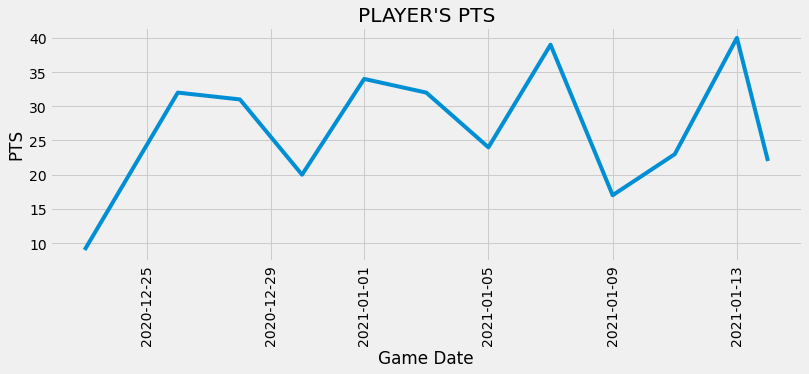

D'Angelo Russell


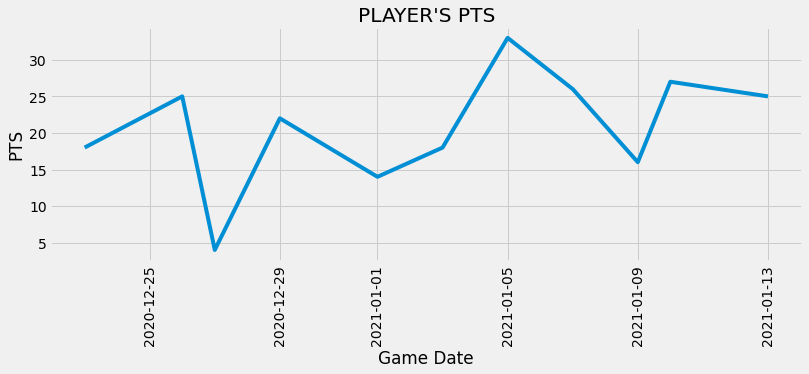

Marcus Smart


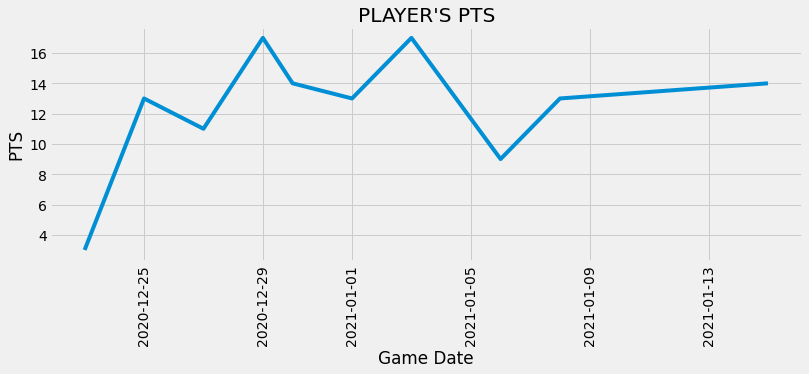

Tobias Harris


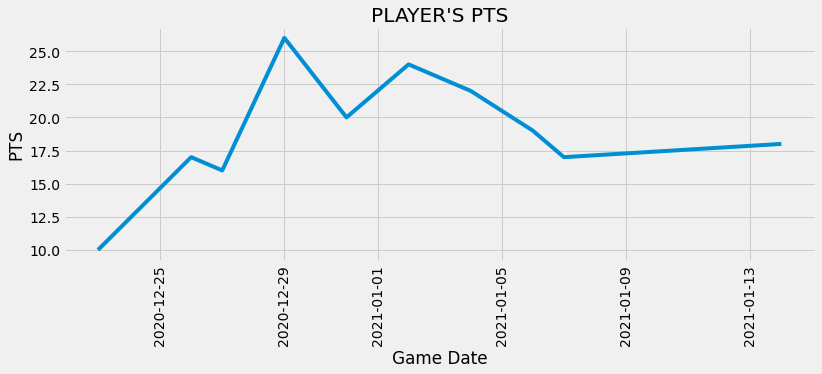

Bam Adebayo


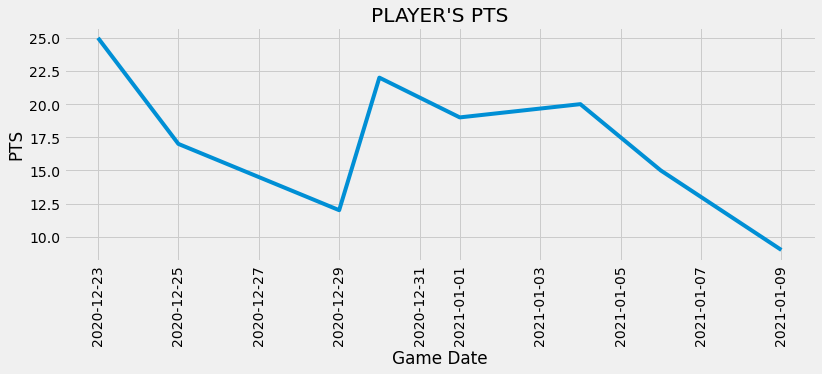

Al Horford


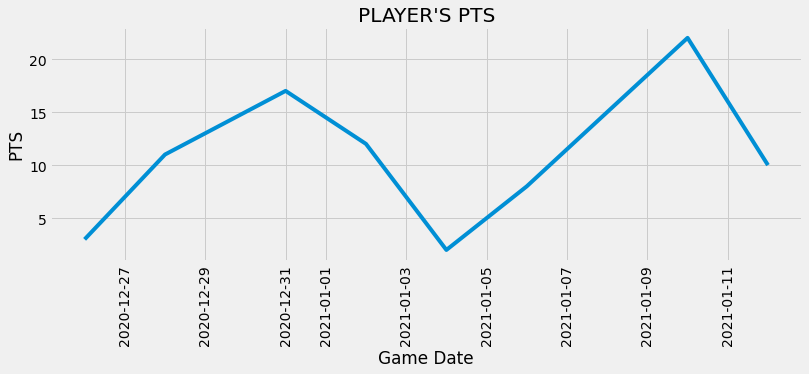

Jusuf Nurkic


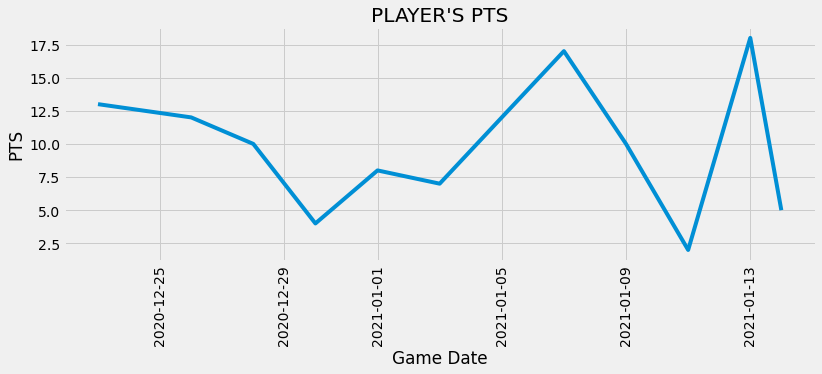

Dennis Schroder


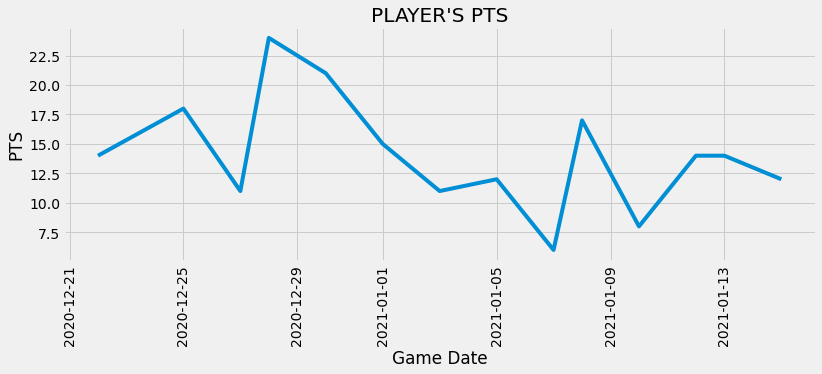

Daniel Theis


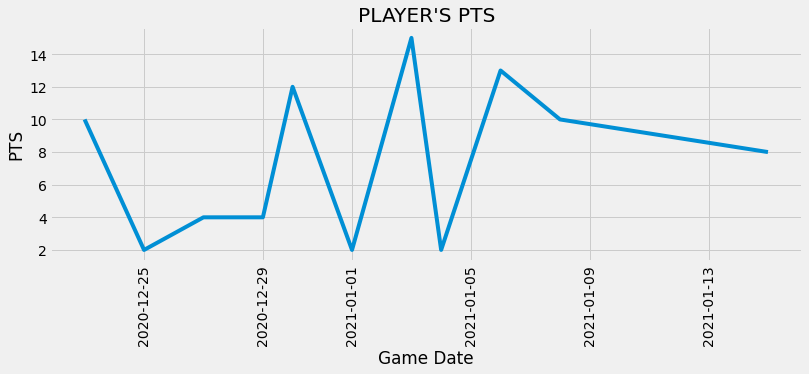

Will Barton


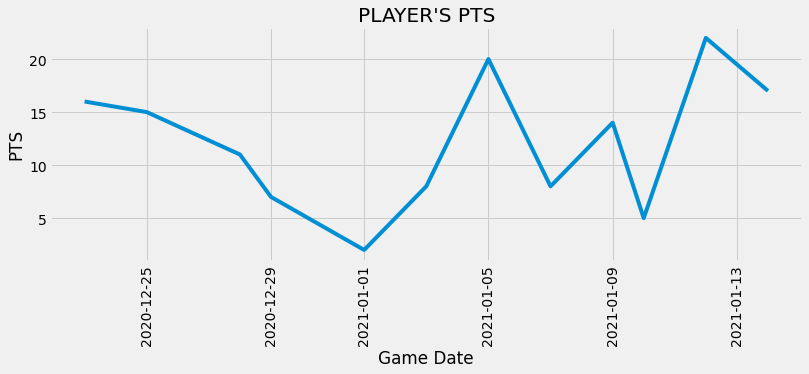

Cam Reddish


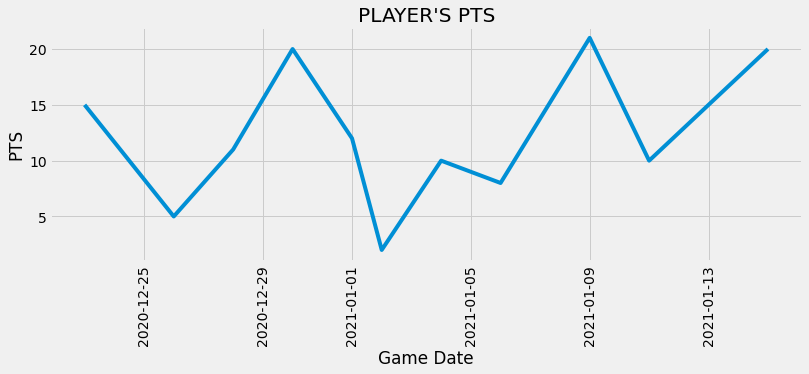

Patrick Beverly


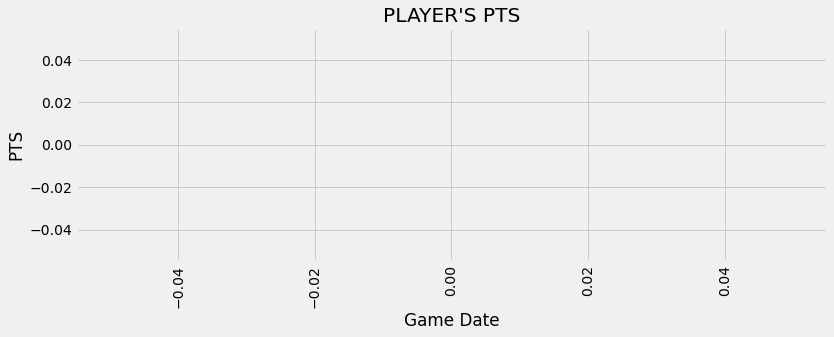

Hamidou Diallo


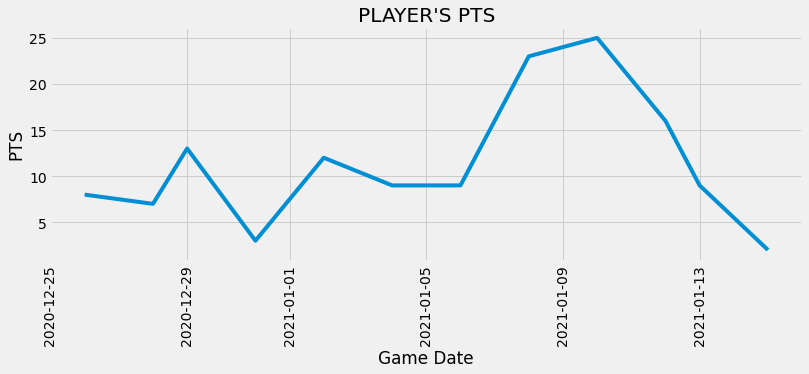

In [103]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='PTS', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S PTS')
    plt.xlabel('Game Date')
    plt.ylabel('PTS')
    plt.xticks(rotation=90)
    plt.show()
#PTS trend of my players

Damian Lillard


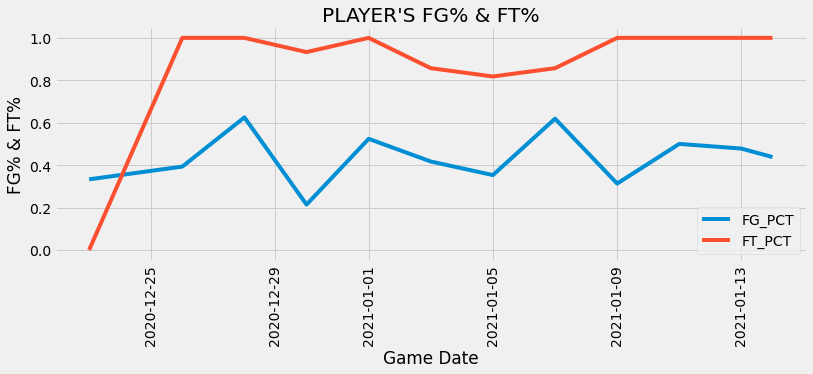

D'Angelo Russell


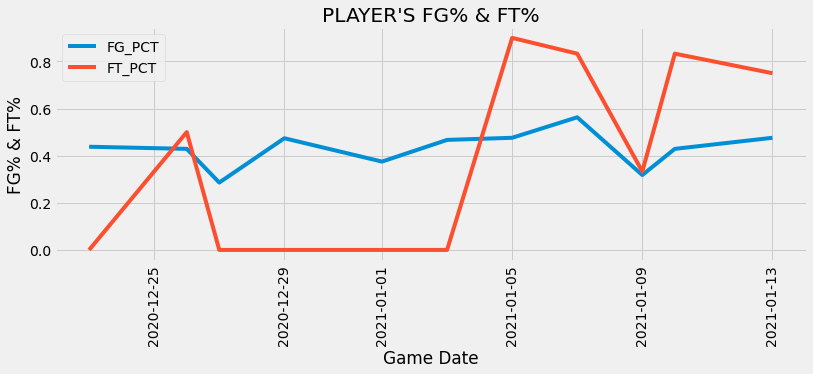

Marcus Smart


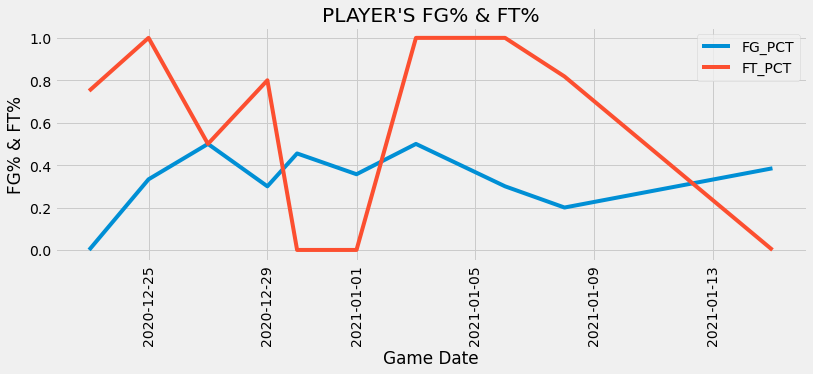

Tobias Harris


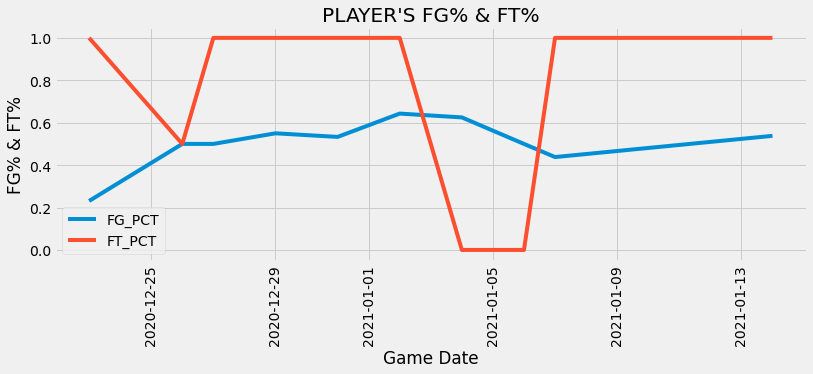

Bam Adebayo


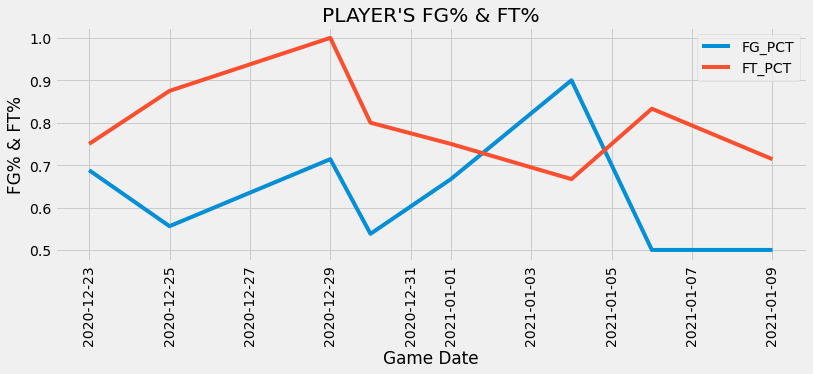

Al Horford


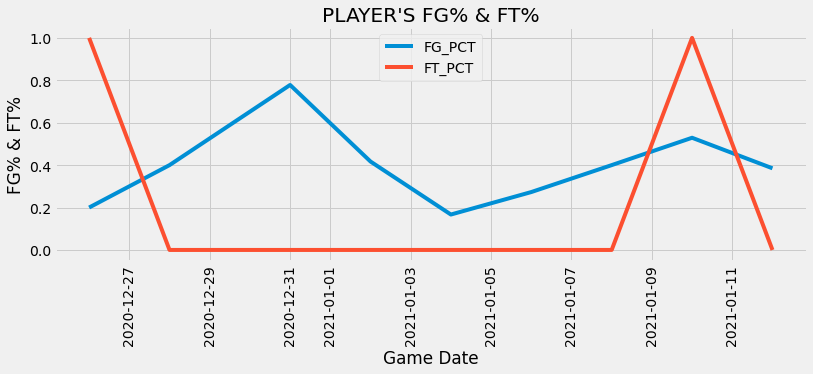

Jusuf Nurkic


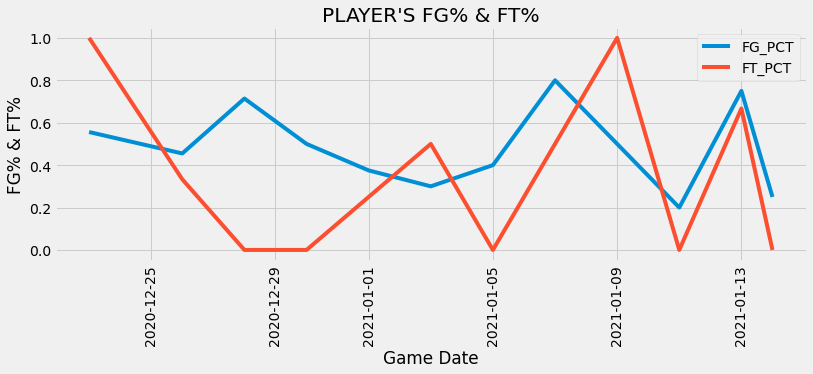

Dennis Schroder


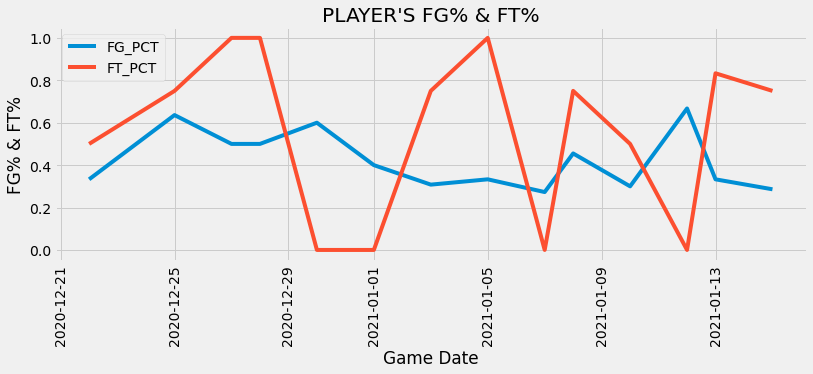

Daniel Theis


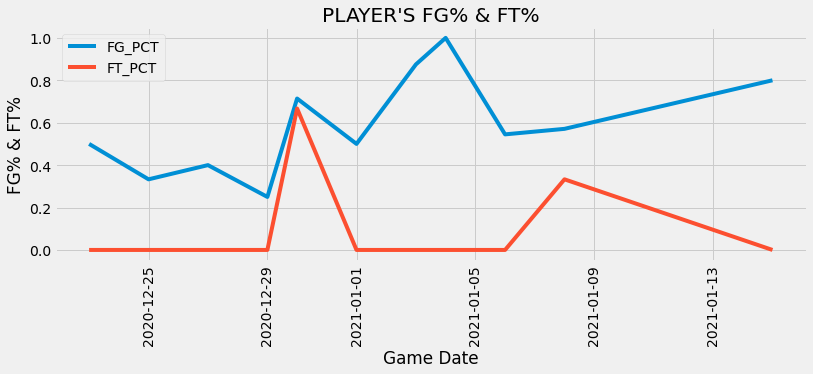

Will Barton


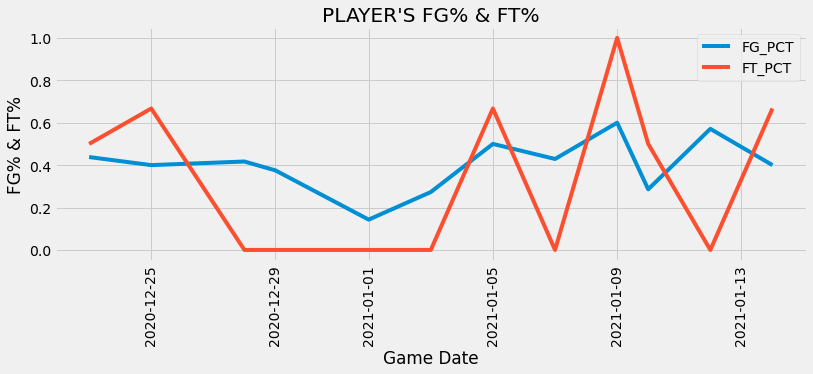

Cam Reddish


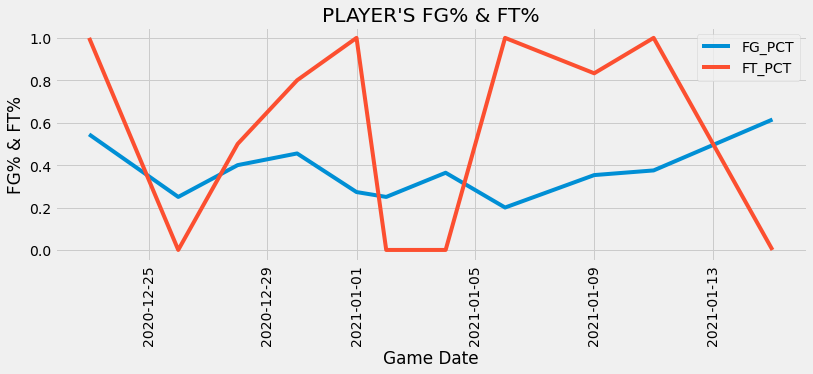

Patrick Beverly


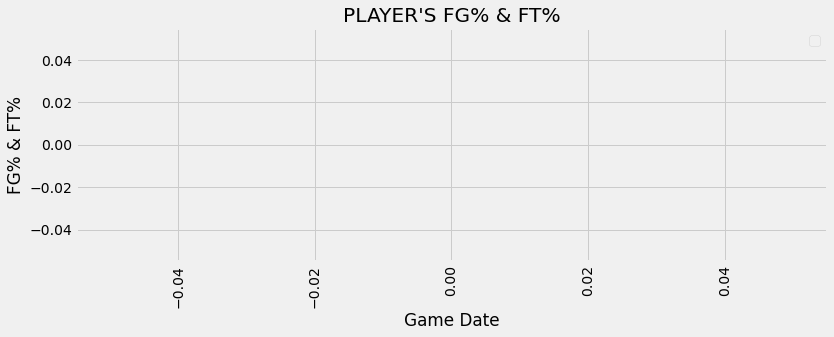

Hamidou Diallo


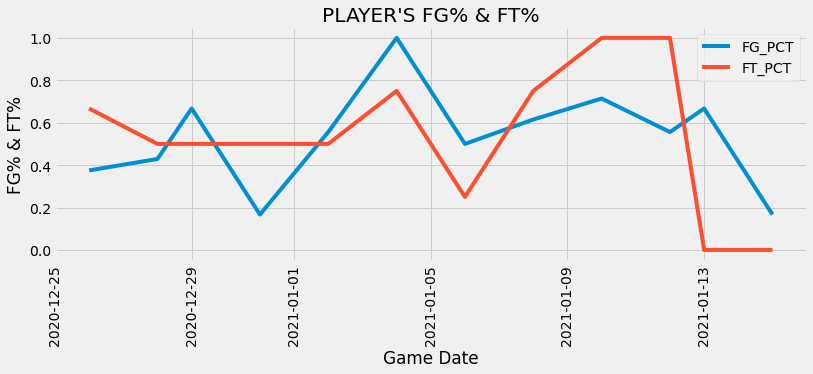

In [104]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='FT_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S FG% & FT%')
    plt.xlabel('Game Date')
    plt.ylabel('FG% & FT%')
    plt.xticks(rotation=90)
    plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
    plt.show()
#FG% and FT% trends of my players

Damian Lillard


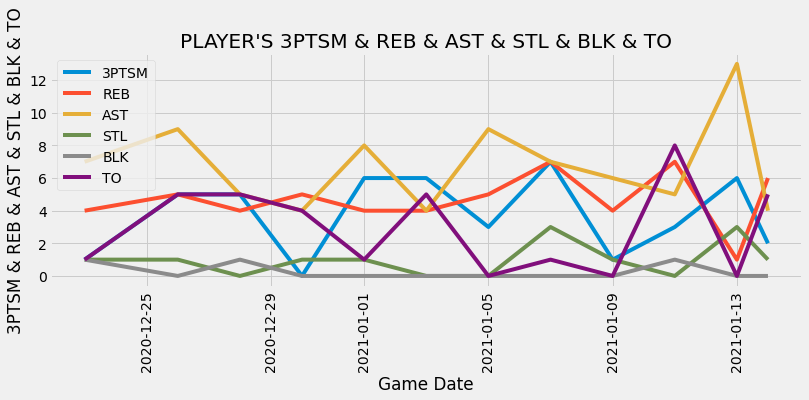

D'Angelo Russell


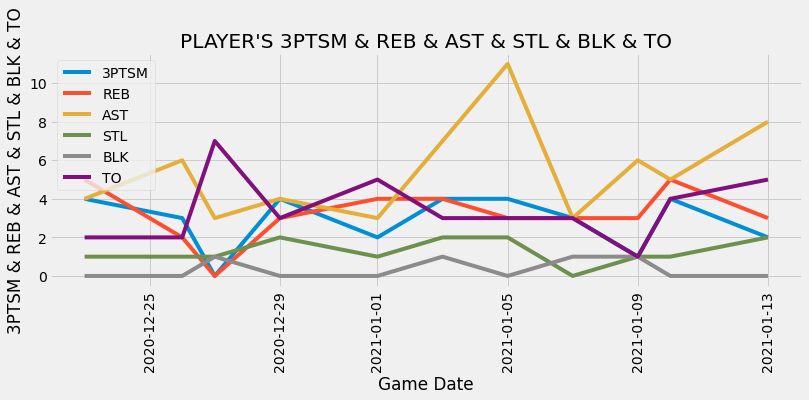

Marcus Smart


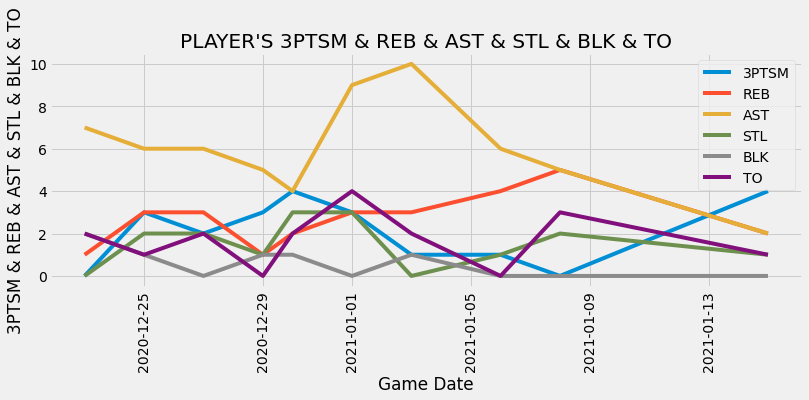

Tobias Harris


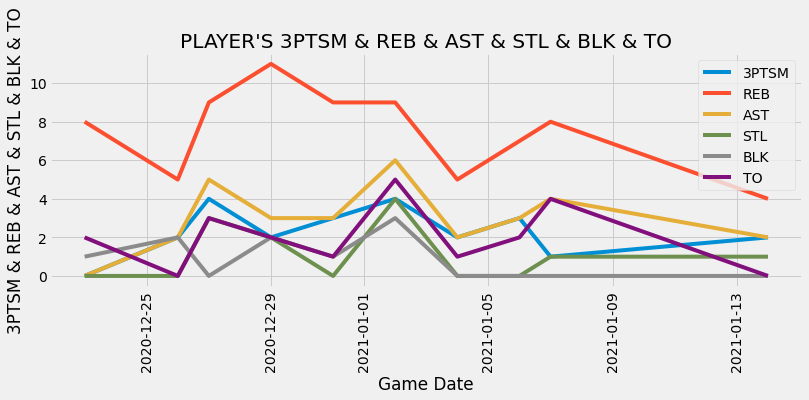

Bam Adebayo


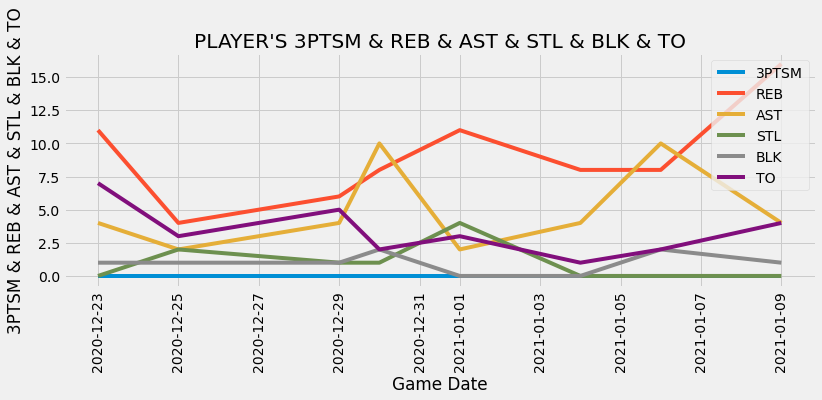

Al Horford


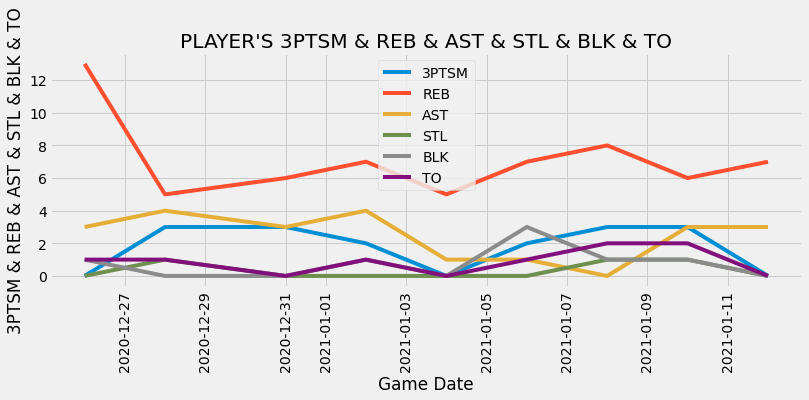

Jusuf Nurkic


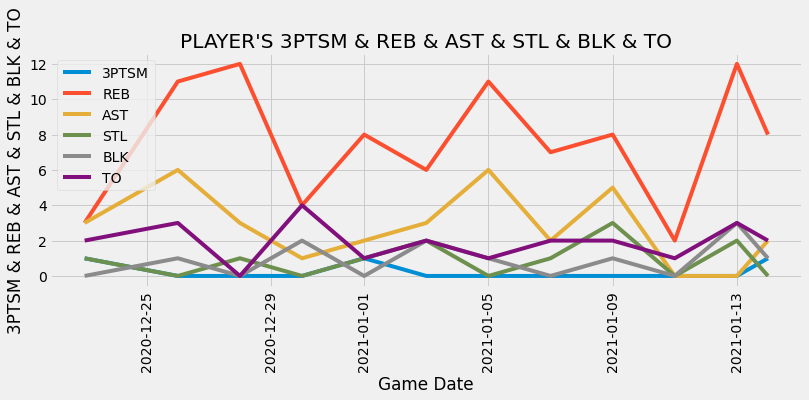

Dennis Schroder


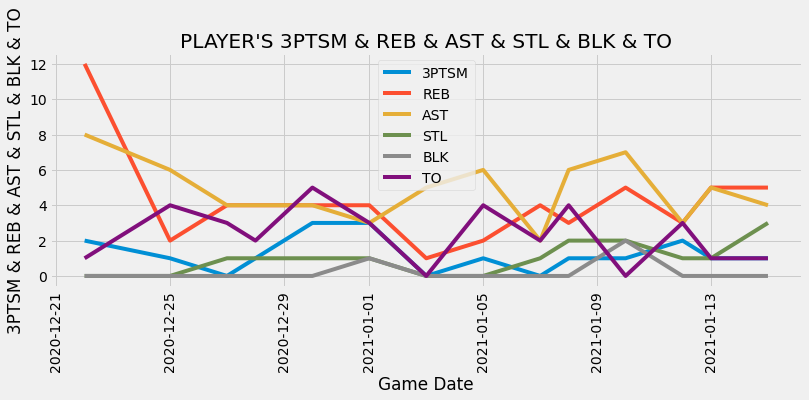

Daniel Theis


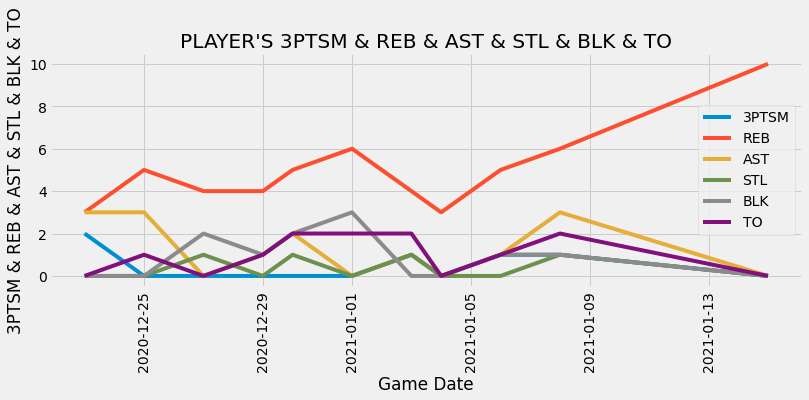

Will Barton


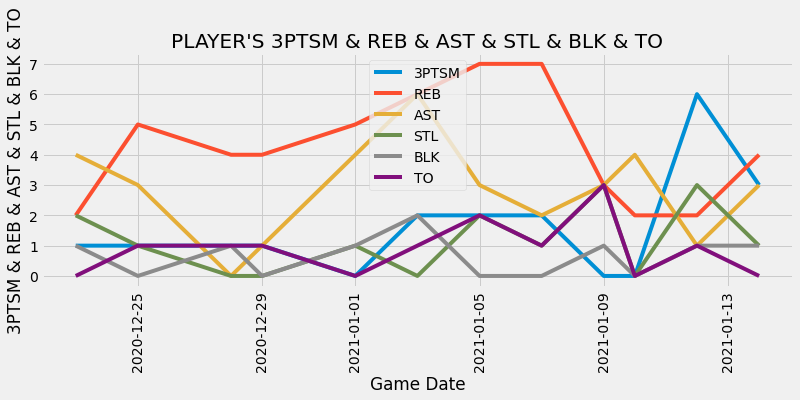

Cam Reddish


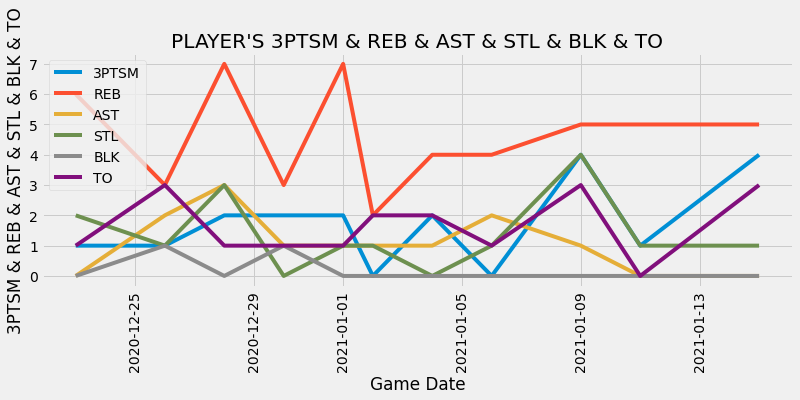

Patrick Beverly


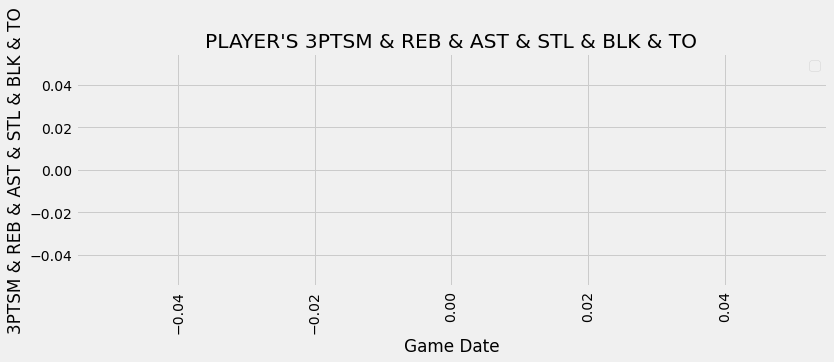

Hamidou Diallo


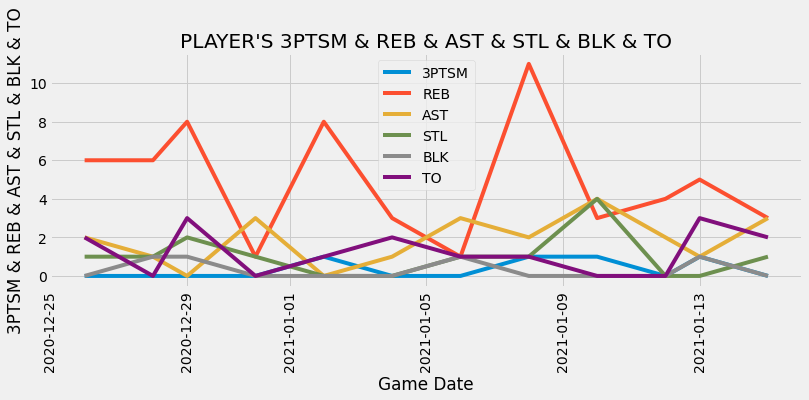

In [105]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG3M', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='REB', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='AST', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='STL', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='BLK', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='TO', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S 3PTSM & REB & AST & STL & BLK & TO')
    plt.xlabel('Game Date')
    plt.ylabel('3PTSM & REB & AST & STL & BLK & TO')
    plt.xticks(rotation=90)
    plt.legend(['3PTSM', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
    plt.show()
#3PTSM, REB, AST, STL, BLK, TO trends of my players

###Finding a player's stats in regular season

In [143]:
player = 'Cedi Osman'
player_id = find_players_by_full_name(player)[0]['id']
player_cumestats = CumeStatsPlayerGames(player_id=player_id)
player_cumestats_df = player_cumestats.get_data_frames()[0]

player_cumestats_df['DATE'] = '-'
player_cumestats_df['HOME'] = '-'
player_cumestats_df['AWAY'] = '-'
for i in range(0, len(player_cumestats_df.MATCHUP)):
    player_cumestats_df['DATE'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][0]
    player_cumestats_df['HOME'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][3]
    player_cumestats_df['AWAY'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][1]
    
player_cumestats_df['DATE'] = pd.to_datetime(player_cumestats_df['DATE'])
player_cumestats_df = player_cumestats_df.drop('MATCHUP', axis=1)

player_boxscore_df = []
for ids in player_cumestats_df.GAME_ID.values:
    df = BoxScoreTraditionalV2(ids).get_data_frames()[0]
    player_boxscore_df.append(df)
player_boxscore_df = pd.concat(player_boxscore_df)

player_boxscore_df = player_boxscore_df.loc[player_boxscore_df['PLAYER_ID'] == player_id]

final_df = pd.merge(player_boxscore_df, player_cumestats_df, how='inner', on='GAME_ID')
final_df = final_df.sort_values(by='DATE')

time.sleep(2)

In [144]:
final_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DATE,HOME,AWAY
12,0022000010,1610612739,CLE,Cleveland,1626224,Cedi Osman,,,17:57,4.0,...,2.0,0.0,0.0,1.0,2.0,11.0,-4.0,2020-12-23,Cavaliers,Hornets
11,0022000023,1610612739,CLE,Cleveland,1626224,Cedi Osman,,,25:56,7.0,...,0.0,1.0,0.0,0.0,1.0,22.0,-12.0,2020-12-26,Pistons,Cavaliers
10,0022000035,1610612739,CLE,Cleveland,1626224,Cedi Osman,,,21:46,5.0,...,2.0,1.0,1.0,1.0,4.0,14.0,20.0,2020-12-27,Cavaliers,76ers
9,0022000046,1610612739,CLE,Cleveland,1626224,Cedi Osman,F,,28:52,2.0,...,3.0,0.0,0.0,1.0,2.0,6.0,-14.0,2020-12-29,Cavaliers,Knicks
8,0022000062,1610612739,CLE,Cleveland,1626224,Cedi Osman,,,21:20,1.0,...,1.0,1.0,0.0,0.0,1.0,3.0,-19.0,2020-12-31,Pacers,Cavaliers
7,0022000083,1610612739,CLE,Cleveland,1626224,Cedi Osman,,,25:51,4.0,...,2.0,0.0,0.0,0.0,1.0,11.0,5.0,2021-01-02,Hawks,Cavaliers
6,0022000093,1610612739,CLE,Cleveland,1626224,Cedi Osman,,,38:27,6.0,...,7.0,2.0,1.0,3.0,3.0,18.0,-10.0,2021-01-04,Magic,Cavaliers
5,0022000108,1610612739,CLE,Cleveland,1626224,Cedi Osman,F,,32:53,1.0,...,7.0,3.0,0.0,2.0,4.0,4.0,-20.0,2021-01-06,Magic,Cavaliers
4,0022000119,1610612739,CLE,Cleveland,1626224,Cedi Osman,F,,38:09,6.0,...,7.0,1.0,0.0,2.0,3.0,16.0,7.0,2021-01-07,Grizzlies,Cavaliers
3,0022000137,1610612739,CLE,Cleveland,1626224,Cedi Osman,F,,30:41,4.0,...,2.0,0.0,0.0,5.0,4.0,9.0,-5.0,2021-01-09,Bucks,Cavaliers


In [145]:
final_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'DATE', 'HOME', 'AWAY'],
      dtype='object')

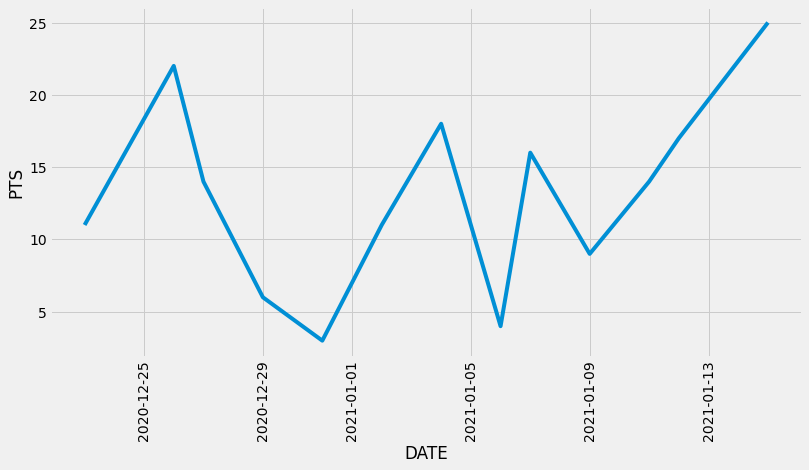

In [146]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='PTS', data=final_df)
plt.xticks(rotation=90)
plt.show()

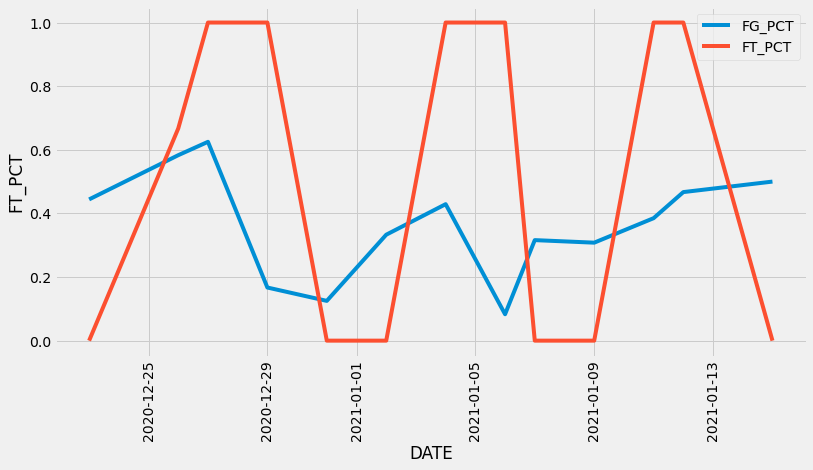

In [147]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG_PCT', data=final_df)
sns.lineplot(x='DATE', y='FT_PCT', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
plt.show()

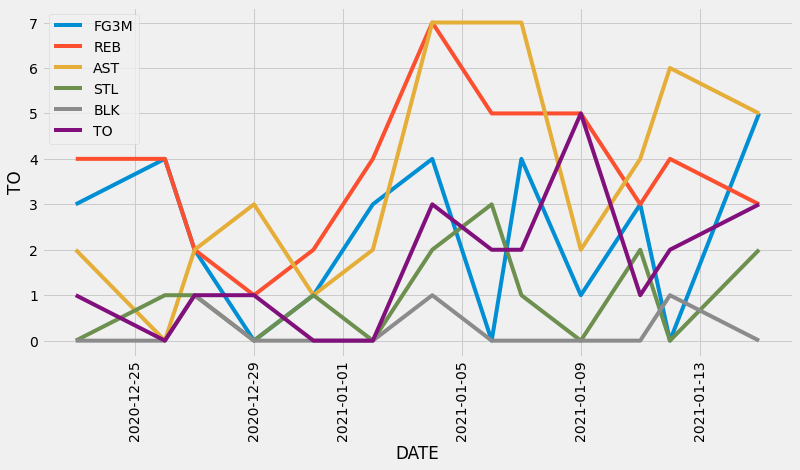

In [148]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG3M', data=final_df)
sns.lineplot(x='DATE', y='REB', data=final_df)
sns.lineplot(x='DATE', y='AST', data=final_df)
sns.lineplot(x='DATE', y='STL', data=final_df)
sns.lineplot(x='DATE', y='BLK', data=final_df)
sns.lineplot(x='DATE', y='TO', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG3M', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
plt.show()